## Часть 1
Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или Arrow, постройте график числа сообщений в зависимости от даты. 

### Часть 2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательная визуализация. 

1. Строим график зависимости сообщений от даты

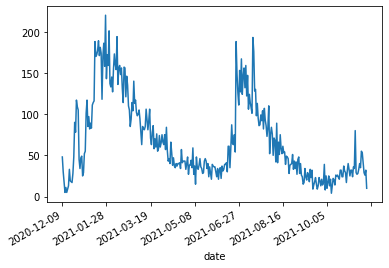

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re

tmp_data = pd.read_csv('data.csv')
data = pd.DataFrame(tmp_data['date'].str.split('T', 1).tolist(),
                    columns=['date', 'time'])
data['message'] = tmp_data['message']
message_per_date = data.groupby('date').size()
message_per_date.plot()
plt.gcf().autofmt_xdate()
plt.show()

2. Извлекаем пол и возраст

In [12]:
data = data.dropna()
data = data[data['message'].str.contains('Ж|М|м|ж')]
data = data[data['message'].str.contains('1|2|3|4|5|6|7|8|9|0')]
data['tmp'] = data['message'].str.extract('([МЖмж].[0123456789].)', flags=re.IGNORECASE, expand=False).str.lower()
data['gender'] = data['tmp'].str.extract('([МЖмж])', flags=re.IGNORECASE, expand=False).str.lower()
data['age'] = data['tmp'].str.extract('([0123456789][0123456789])', flags=re.IGNORECASE, expand=False).str.lower()
data = data.dropna()
data.head()

,date,time,message,tmp,gender,age
2,2021-11-19,07:31:40+00:00,"Ж36 без хроник. Подтвержденный ковид в марте, ...",ж36,ж,36
5,2021-11-19,06:59:44+00:00,М 41 год\nV1 17.11.2021\nСостояние хорошое. Бо...,м 41,м,41
6,2021-11-19,04:50:10+00:00,М25. Хронический тонзиллит.\nКовидом легко бол...,м25.,м,25
8,2021-11-19,04:27:43+00:00,"Ж 49. Из хронических заболеваний гастрит, шей...",ж 49,ж,49
11,2021-11-18,21:08:25+00:00,"Ж22, есть хроническое заболевание (2 грыжи в п...","ж22,",ж,22


3. Строим график кол-ва прививок от пола и возраста

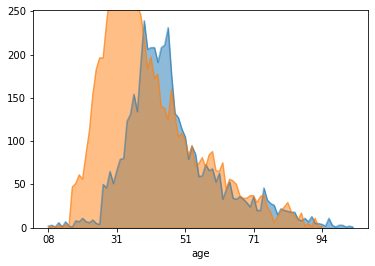

In [13]:
data_for_plot = data.groupby(['gender','age']).size()
data_for_plot['м'].plot.area(alpha=0.5)
data_for_plot['ж'].plot.area(alpha=0.5)
plt.show()

4. Извлечение количества антител

In [15]:
data = data[data['message'].str.contains('bau|BAU|Bau')]
data['bau'] = data['message'].str.extract('(...[0123456789.,][0123456789][0123456789].bau)', flags=re.IGNORECASE,
                                          expand=False).str.lower()
data['bau'] = data['bau'].str.replace(' bau', '')
data['bau'] = data['bau'].str.replace(',', '.')
data['bau'] = data['bau'].str.replace('.[0123456789][.]', '')
data['bau'] = data['bau'].str.replace('(\D)', '')
data = data[data['bau'].str.len() < 5]
data['bau'] = pd.to_numeric(data['bau'], errors='ignore')
data = data.dropna()
data.head()

,date,time,message,tmp,gender,age,bau
29,2021-11-18,12:34:40+00:00,"Ж83 года, гипертония, атеросклероз, артроз, не...",ж83,ж,83,149
33,2021-11-18,09:24:20+00:00,"М 33 года. Гипертензия, ИМТ 36, аллергия на бе...",м 33,м,33,1832
40,2021-11-18,04:30:27+00:00,М46 - из хроники - тонзиллит.\nБолел в мае 202...,м46,м,46,208
96,2021-11-16,05:04:17+00:00,Ж 25. Без хронических заболеваний.\nСпутник V\...,ж 25,ж,25,483
109,2021-11-15,16:45:15+00:00,"#Ревак Спутник V\nЖ 59.\nХр.: гипертония, осте...",ж 59,ж,59,194


5. Построение графика антител от возраста

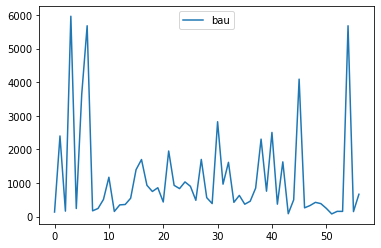

In [16]:
data_for_plot = data.groupby(['age'])['bau'].mean().reset_index()
data_for_plot.plot()
plt.show()